In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
import plotly.graph_objects as go
from itertools import cycle
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [ ]:
pip install prophet

In [59]:
import pandas as pd
from prophet import Prophet

In [60]:
from google.colab import drive


In [61]:
df=pd.read_csv("/content/TCS.csv")

In [62]:
df

,date,open,high,low,close,volume
0,2015-02-02 09:15:00+05:30,1241.00,1245.00,1231.03,1244.63,335040
1,2015-02-02 09:45:00+05:30,1244.33,1255.00,1244.18,1252.58,353600
2,2015-02-02 10:15:00+05:30,1252.98,1252.98,1248.50,1250.95,175246
3,2015-02-02 10:45:00+05:30,1250.95,1252.50,1250.00,1251.08,187144
4,2015-02-02 11:15:00+05:30,1251.08,1257.10,1250.43,1252.75,200666
...,...,...,...,...,...,...
22605,2022-02-18 13:15:00+05:30,3808.25,3809.25,3794.10,3799.35,224973
22606,2022-02-18 13:45:00+05:30,3799.35,3801.30,3790.00,3790.00,231164
22607,2022-02-18 14:15:00+05:30,3790.25,3793.95,3781.10,3790.05,253070
22608,2022-02-18 14:45:00+05:30,3790.05,3799.90,3786.30,3794.50,368260


In [63]:
df['date'] = pd.to_datetime(df['date'])

In [64]:
df['Date'] = [d.date() for d in df['date']]
df['Time'] = [d.time() for d in df['date']]

In [65]:
df

,date,open,high,low,close,volume,Date,Time
0,2015-02-02 09:15:00+05:30,1241.00,1245.00,1231.03,1244.63,335040,2015-02-02,09:15:00
1,2015-02-02 09:45:00+05:30,1244.33,1255.00,1244.18,1252.58,353600,2015-02-02,09:45:00
2,2015-02-02 10:15:00+05:30,1252.98,1252.98,1248.50,1250.95,175246,2015-02-02,10:15:00
3,2015-02-02 10:45:00+05:30,1250.95,1252.50,1250.00,1251.08,187144,2015-02-02,10:45:00
4,2015-02-02 11:15:00+05:30,1251.08,1257.10,1250.43,1252.75,200666,2015-02-02,11:15:00
...,...,...,...,...,...,...,...,...
22605,2022-02-18 13:15:00+05:30,3808.25,3809.25,3794.10,3799.35,224973,2022-02-18,13:15:00
22606,2022-02-18 13:45:00+05:30,3799.35,3801.30,3790.00,3790.00,231164,2022-02-18,13:45:00
22607,2022-02-18 14:15:00+05:30,3790.25,3793.95,3781.10,3790.05,253070,2022-02-18,14:15:00
22608,2022-02-18 14:45:00+05:30,3790.05,3799.90,3786.30,3794.50,368260,2022-02-18,14:45:00


In [66]:
closedf = df[['Date','close']]

In [67]:
closedf.dtypes

Date      object
close    float64
dtype: object

In [68]:
closedf['Date'] = pd.to_datetime(closedf['Date'])

In [69]:
closedf.rename(columns = {'Date':'ds'}, inplace = True)
closedf.rename(columns = {'close':'y'}, inplace = True)

In [70]:
m = Prophet()
m.fit(closedf)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0xqoj3nv/3k2iqa7p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0xqoj3nv/zwd9nh6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73738', 'data', 'file=/tmp/tmp0xqoj3nv/3k2iqa7p.json', 'init=/tmp/tmp0xqoj3nv/zwd9nh6_.json', 'output', 'file=/tmp/tmpoxk9zf6a/prophet_model-20220725101046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:10:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:11:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [71]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2105,2023-02-14
2106,2023-02-15
2107,2023-02-16
2108,2023-02-17
2109,2023-02-18


In [72]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2105,2023-02-14,4824.803054,3675.635964,5943.969092
2106,2023-02-15,4829.050182,3648.806034,5978.983161
2107,2023-02-16,4831.053390,3678.575674,5944.911076
2108,2023-02-17,4831.207778,3643.321931,5957.349097
2109,2023-02-18,4818.600463,3619.426703,5957.935694


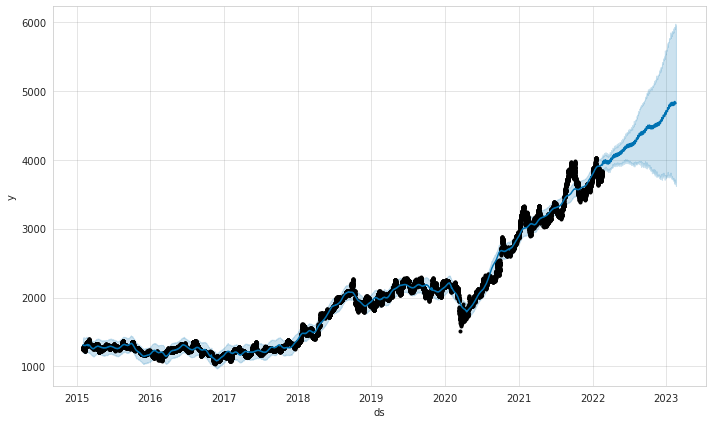

In [73]:
fig1 = m.plot(forecast)


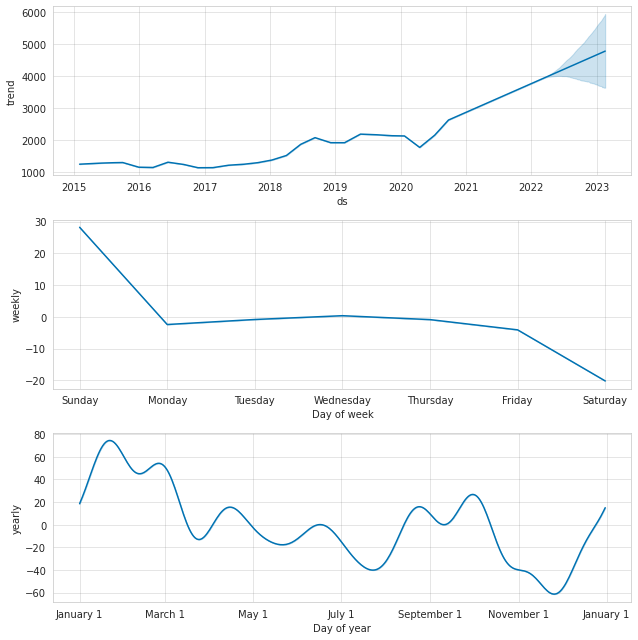

In [74]:
fig2 = m.plot_components(forecast)


In [75]:
metric_df = forecast.set_index('ds')[['yhat']].join(closedf.set_index('ds').y).reset_index()


In [76]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [77]:
plot_components_plotly(m, forecast)


In [78]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')


INFO:prophet:Making 9 forecasts with cutoffs between 2017-03-11 00:00:00 and 2021-02-18 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0xqoj3nv/0_211ryt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0xqoj3nv/kv4gpuio.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30333', 'data', 'file=/tmp/tmp0xqoj3nv/0_211ryt.json', 'init=/tmp/tmp0xqoj3nv/kv4gpuio.json', 'output', 'file=/tmp/tmpgf6hzjxv/prophet_model-20220725101127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:11:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:11:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0xqoj3nv/q86s5bda.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0xqoj3nv/dkc7o2fr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-pack

In [79]:
df_cv.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-03-14,1267.313918,1240.082132,1295.563702,1284.13,2017-03-11
1,2017-03-14,1267.313918,1239.474768,1297.446605,1283.85,2017-03-11
2,2017-03-14,1267.313918,1239.176833,1297.038133,1284.93,2017-03-11
3,2017-03-14,1267.313918,1239.586339,1295.410939,1280.08,2017-03-11
4,2017-03-14,1267.313918,1240.538153,1295.626799,1284.98,2017-03-11


In [80]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,28812.568870,169.742655,110.880476,0.057339,0.036921,0.055290,0.410283
1,39 days,30712.950544,175.251107,115.078134,0.059957,0.038478,0.057680,0.400716
2,40 days,32025.475059,178.956629,119.093545,0.061870,0.040127,0.059628,0.391264
3,41 days,32990.234599,181.632141,121.922666,0.063343,0.041961,0.061155,0.381892
4,42 days,33890.591239,184.093974,124.494431,0.064365,0.043271,0.062241,0.374754


In [81]:
metric_df = forecast.set_index('ds')[['yhat']].join(closedf.set_index('ds').y).reset_index()

In [82]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [83]:
metric_df.dropna(inplace=True)

In [84]:
r2_score(metric_df.y,metric_df.yhat)

0.9886360666831453